<a href="https://colab.research.google.com/github/himan6huu/python/blob/main/Customer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

n_customers = 500

ages=np.random.randint(18, 70, n_customers)
genders= np.random.randint(0, 2, n_customers)
income= np.random.normal(50, 15, n_customers)
purchase_freq= np.random.poisson(3, n_customers)

churn= ((income<40) & (purchase_freq<3)).astype(int)

df_customers= pd.DataFrame({
    'age': ages,
    'gender': genders,
    'income': income,
    'purchase_freq': purchase_freq,
    'churn': churn
})

df_customers.to_csv('customer_data.csv', index=False)

print("Customer data created and saved to 'customers.csv'")
print(df_customers.head())

Customer data created and saved to 'customers.csv'
   age  gender     income  purchase_freq  churn
0   56       1  24.449263              2      1
1   69       0  49.166785              2      0
2   46       0  55.760982              4      0
3   32       1  49.509579              4      0
4   60       0  18.988368              1      1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('customer_data.csv')

df.head()

,age,gender,income,purchase_freq,churn
0,56,1,24.449263,2,1
1,69,0,49.166785,2,0
2,46,0,55.760982,4,0
3,32,1,49.509579,4,0
4,60,0,18.988368,1,1


In [ ]:
df.info()
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            500 non-null    int64  
 1   gender         500 non-null    int64  
 2   income         500 non-null    float64
 3   purchase_freq  500 non-null    int64  
 4   churn          500 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 19.7 KB
age              0
gender           0
income           0
purchase_freq    0
churn            0
dtype: int64


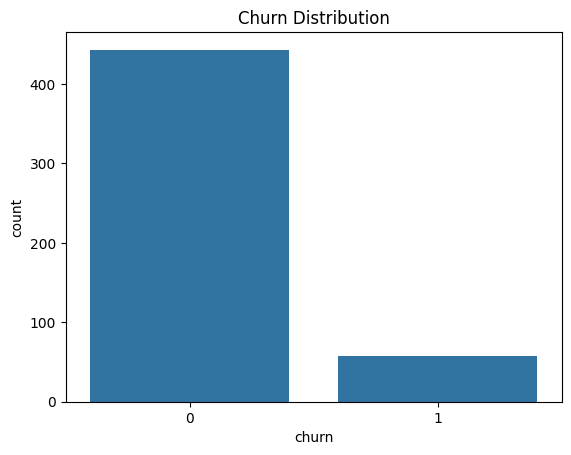

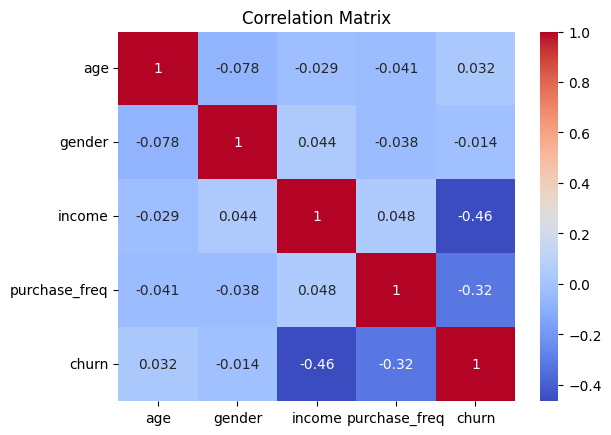

In [ ]:
sns.countplot(data = df, x='churn')
plt.title("Churn Distribution")
plt.show()



sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
x = df.drop('churn', axis=1)

y = df['churn']



x_train, x_test, y_train, y_test = train_test_split(

    x, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)



LogisticRegression()

Accuracy: 0.91
Confusion Matrix:
 [[85  2]
 [ 7  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        87
           1       0.75      0.46      0.57        13

    accuracy                           0.91       100
   macro avg       0.84      0.72      0.76       100
weighted avg       0.90      0.91      0.90       100



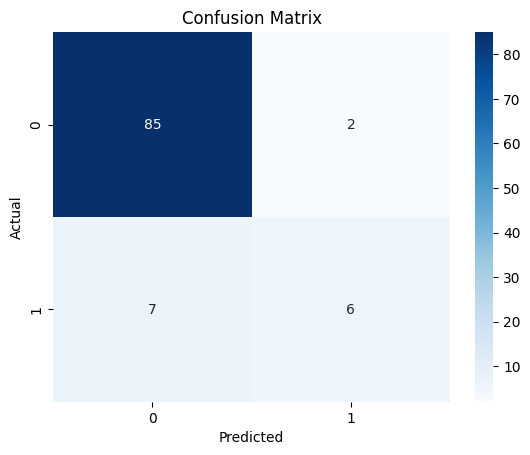

In [ ]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
new_customer_data = pd.DataFrame({
    'age': [28],
    'gender': [1],
    'income': [37],
    'purchase_freq': [2]
})

prediction = model.predict(new_customer_data)[0]

if prediction == 1:
    print("This customer is likely to CHURN. Consider offering retention benefits.")
else:
    print("This customer is likely to STAY. Continue engagement as usual.")


This customer is likely to STAY. Continue engagement as usual.
